<a href="https://colab.research.google.com/github/sebz04/CA_03/blob/main/CA03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as py
import seaborn as sns
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")


***Q.1 Why does it makes sense to discretize columns for this problem?***

It groups similar values together so that the decision tree can categorize similar values and create predicting values. Instead of continous numerical values, it groups them into meaningful categories and reducing small variations.

***Q.2 What might be the issues (if any) if we DID NOT discretize the columns***

It can lead to more groups and a larger decision tree. There will be more uncertaintiy. There will be overfitting and will lead to creating too many tiny little splits.

In [ ]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


Head shows the first columns so we can see the binning results

In [ ]:
df.dtypes

,0
hours_per_week_bin,object
occupation_bin,object
msr_bin,object
capital_gl_bin,object
race_sex_bin,object
education_num_bin,object
education_bin,object
workclass_bin,object
age_bin,object
flag,object


This confirms that all columns except the answer is an object and categorical value

In [ ]:
#describing the dataset
df.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Axes(0.125,0.11;0.775x0.77)


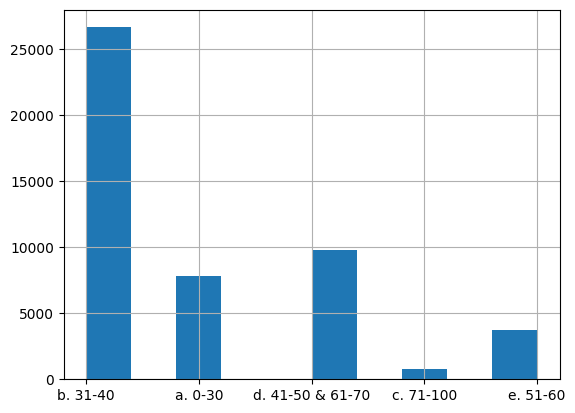

In [ ]:
print(df["hours_per_week_bin"].hist())

Axes(0.125,0.11;0.775x0.77)


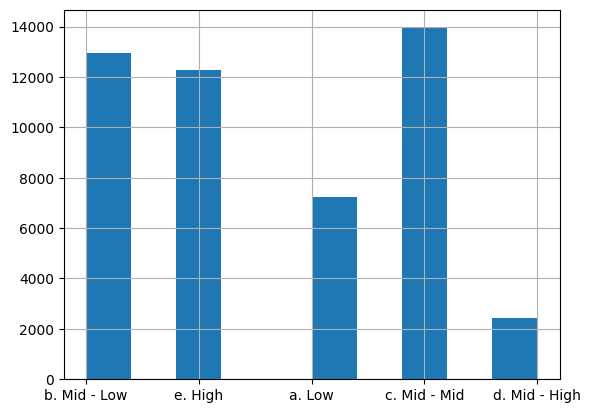

In [ ]:
print(df["occupation_bin"].hist())

Axes(0.125,0.11;0.775x0.77)


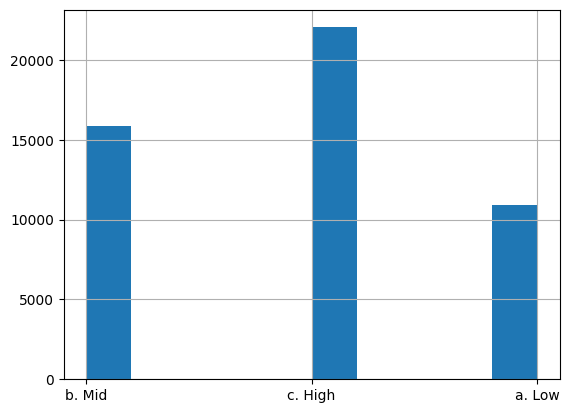

In [ ]:
print(df["msr_bin"].hist())

Axes(0.125,0.11;0.775x0.77)


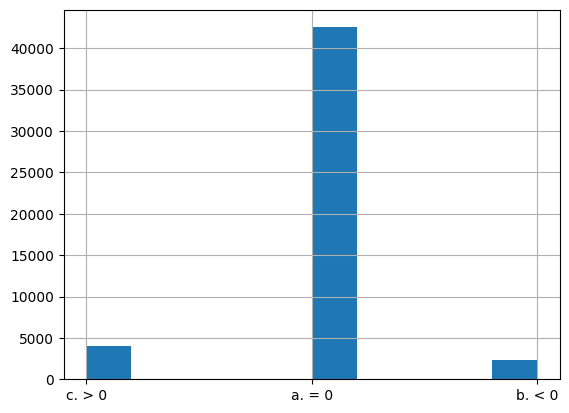

In [ ]:
print(df["capital_gl_bin"].hist())

Axes(0.125,0.11;0.775x0.77)


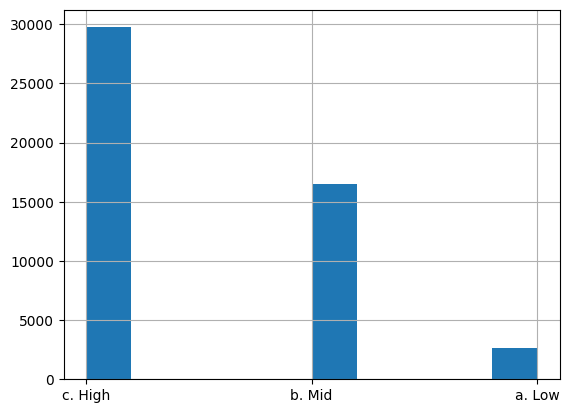

In [ ]:
print(df["race_sex_bin"].hist())

Axes(0.125,0.11;0.775x0.77)


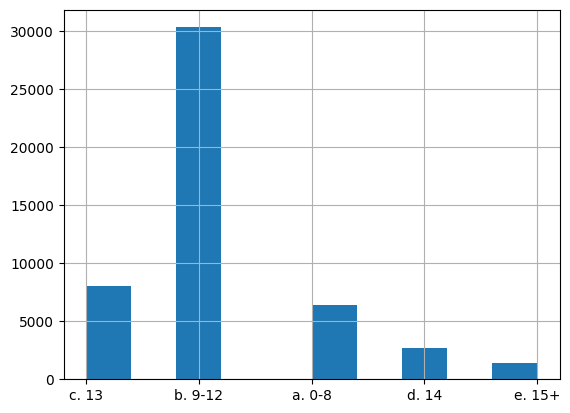

In [ ]:
print(df["education_num_bin"].hist())

Axes(0.125,0.11;0.775x0.77)


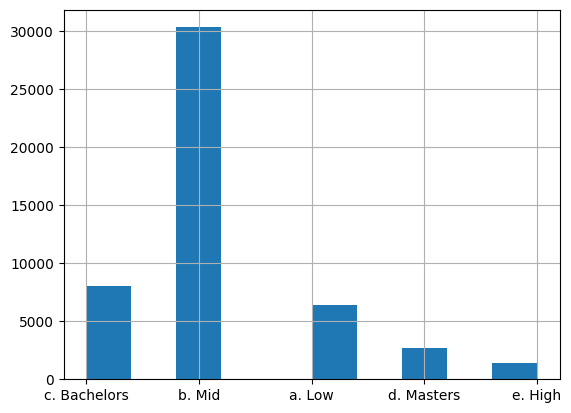

In [ ]:
print(df["education_bin"].hist())

Axes(0.125,0.11;0.775x0.77)


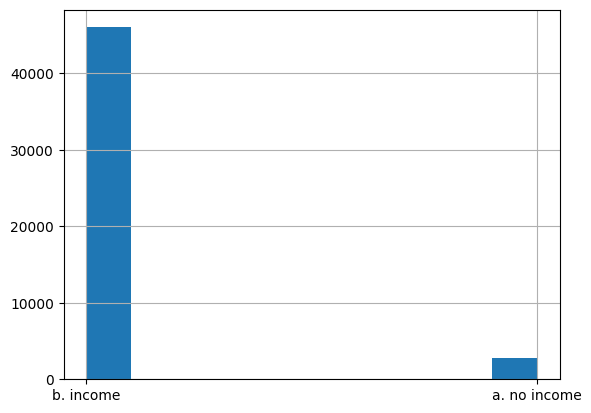

In [ ]:
print(df["workclass_bin"].hist())

Axes(0.125,0.11;0.775x0.77)


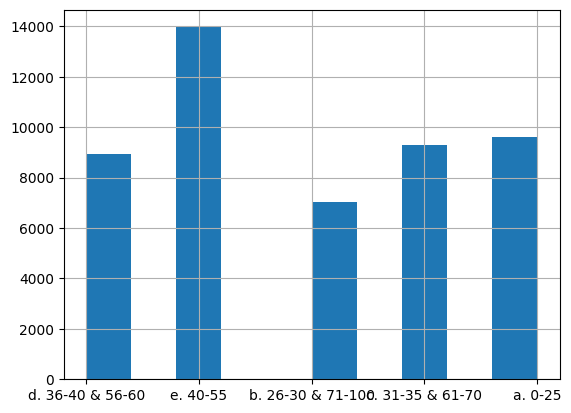

In [ ]:
print(df["age_bin"].hist())

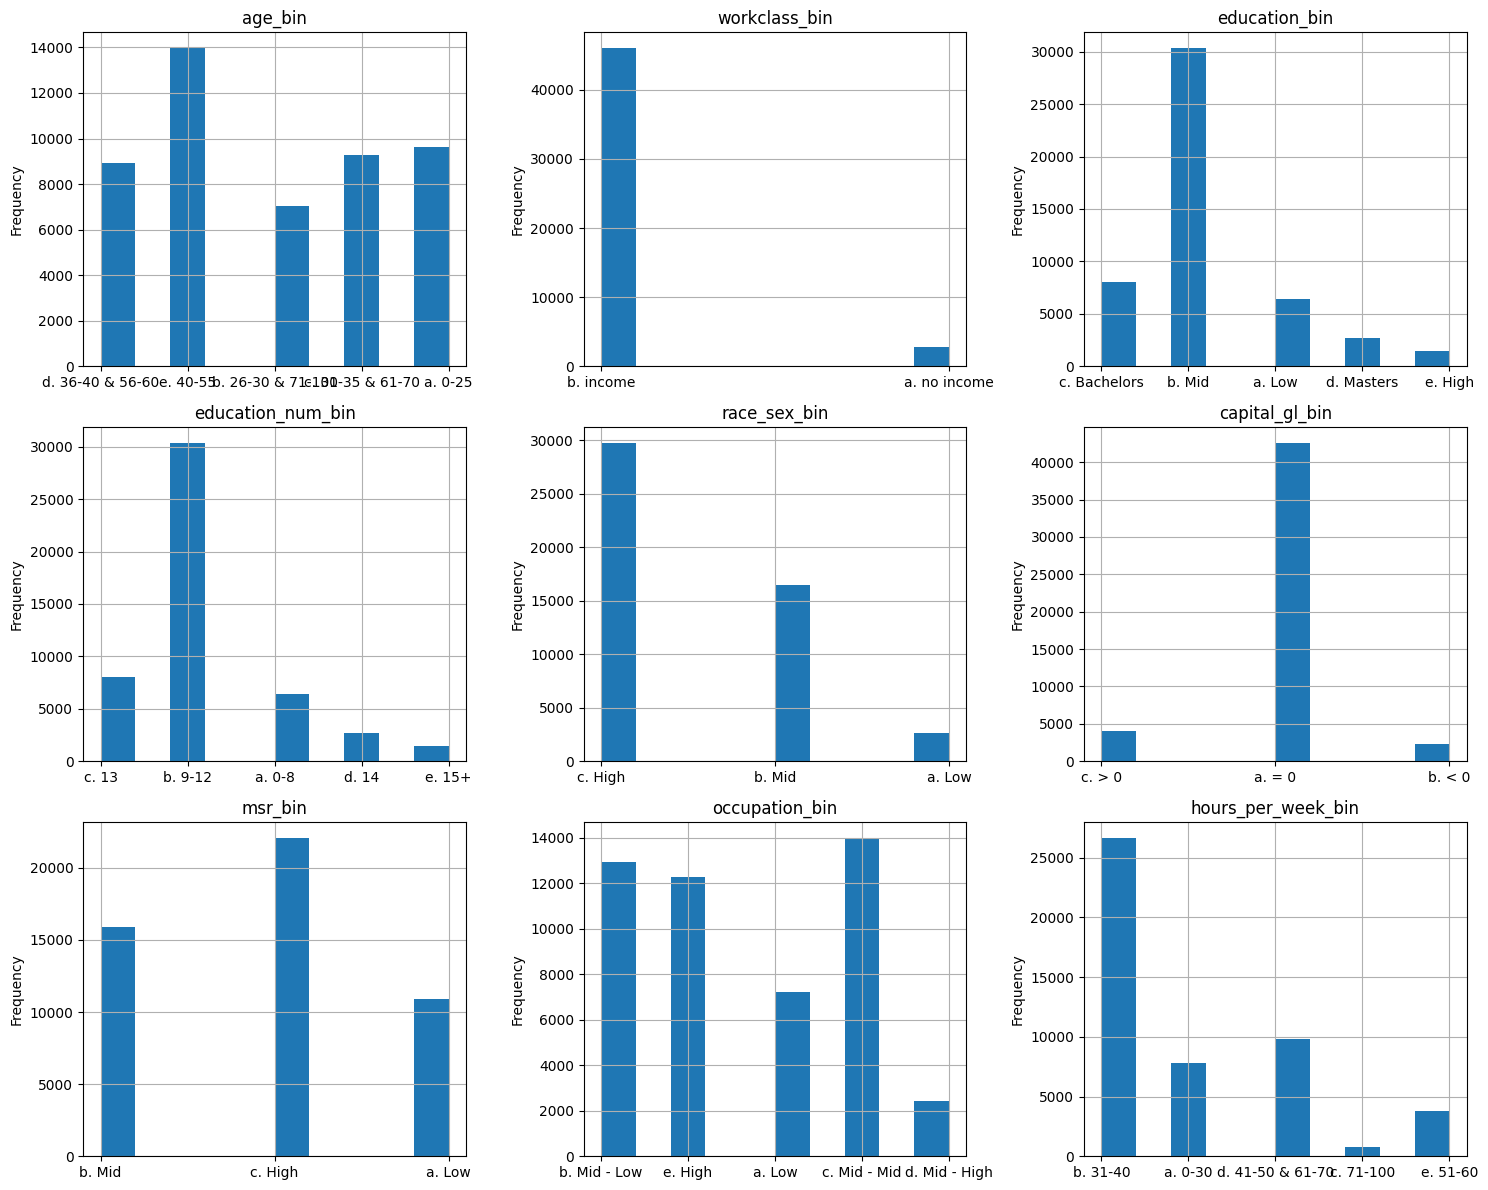

In [ ]:
import matplotlib.pyplot as plt

columns = [
    "age_bin",
    "workclass_bin",
    "education_bin",
    "education_num_bin",
    "race_sex_bin",
    "capital_gl_bin",
    "msr_bin",
    "occupation_bin",
    "hours_per_week_bin"
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    df[col].hist()
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Results we found from the bin:
- 9-12 is the highest, most common form of education, skweing towards this section
- Workclass is heavily skewed towards income
- Mid holds the highest number in terms of education
- Ages ranges primarily from 40-55 yet more even all around
- MSR is overall even but mostly centered around High

In [ ]:
df.isna()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False


In [ ]:

missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


No missing values found

In [ ]:
df.describe(include='all')

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


Description of each bin makes sense

In [ ]:
duplicates = df.duplicated().sum()

print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 40012


***Duplicate rows are bound to be found since there are bins***

In [ ]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())



Column: hours_per_week_bin
['b. 31-40' 'a. 0-30' 'd. 41-50 & 61-70' 'c. 71-100' 'e. 51-60']

Column: occupation_bin
['b. Mid - Low' 'e. High' 'a. Low' 'c. Mid - Mid' 'd. Mid - High']

Column: msr_bin
['b. Mid' 'c. High' 'a. Low']

Column: capital_gl_bin
['c. > 0' 'a. = 0' 'b. < 0']

Column: race_sex_bin
['c. High' 'b. Mid' 'a. Low']

Column: education_num_bin
['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+']

Column: education_bin
['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High']

Column: workclass_bin
['b. income' 'a. no income']

Column: age_bin
['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25']

Column: flag
['train' 'test']

Column: y
[0 1]


All Columns seem to be unique and have their own categories so no need to clean


The dataset was examined for missing values, duplicates, and outliers.

- Missing Values: No missing values were found in the dataset.
- Duplicates: There were duplicate rows, but because of binning, there's bound to be duplicates in this manner
- Data Types: All columns have appropriate data types.
- All columns have their own unique categories

Based on this analysis, minimal data cleaning was required. The dataset is suitable for building the decision tree model.


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("y", axis=1)   # features
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

In [ ]:
#from sklearn.tree import DecisionTreeClassifier

#dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                               #max_features=None, min_samples_leaf=15)

#dtree.fit(X_train, y_train)
#y_pred = dtree.predict(X_test)


In [ ]:
X_train.dtypes

,0
hours_per_week_bin,object
occupation_bin,object
msr_bin,object
capital_gl_bin,object
race_sex_bin,object
education_num_bin,object
education_bin,object
workclass_bin,object
age_bin,object
flag,object


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1) Define target + features (change 'target_col' to your actual target column)
target_col = "y"   # <-- replace with your target column name

X = df[[
    "hours_per_week_bin", "occupation_bin", "msr_bin", "capital_gl_bin",
    "race_sex_bin", "education_num_bin", "education_bin", "workclass_bin",
    "age_bin"
]].copy()

y = df[target_col].copy()

# 2) One-hot encode X (turn categories into 0/1 columns)
X_encoded = pd.get_dummies(X, drop_first=False)

# 3) (Optional but common) Ensure y is numeric if it's Yes/No or strings
# Example if y looks like ">50K" and "<=50K"
# y = (y == ">50K").astype(int)

# 4) Train/test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.30,
    random_state=101,
    stratify=y  # remove this line if y is continuous
)

# 5) Fit model
dtree = DecisionTreeClassifier(
    max_depth=3,
    random_state=101,
    max_features=None,
    min_samples_leaf=5
)

dtree.fit(X_train, y_train)

# 6) Predict
y_pred = dtree.predict(X_test)
print("Success. Predictions sample:", y_pred[:10])


Success. Predictions sample: [1 0 1 0 0 0 1 0 1 0]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=10, random_state=101,
                               max_features=None, min_samples_leaf=15)

dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

training our first decision tree model using the training dataset and then generate predictions on the test dataset.

In [ ]:
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

comparison.head(20)


,Actual,Predicted
0,1,1
1,1,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


Comparing actual vs predicted

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8444004640687913


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[10347   800]
 [ 1480  2026]]


[[TN  FP]
 [FN  TP]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11147
           1       0.72      0.58      0.64      3506

    accuracy                           0.84     14653
   macro avg       0.80      0.75      0.77     14653
weighted avg       0.84      0.84      0.84     14653



- **Precision:** How often the model’s predictions are correct  
  - Class 0: 0.87 (strong)  
  - Class 1: 0.72 (moderate)

- **Recall:** How well the model identifies actual cases  
  - Class 0: 0.93 (very strong)  
  - Class 1: 0.58 (weaker — many class 1 cases are missed)

- **F1-score:** Balance between precision and recall  
  - Class 0: 0.90  
  - Class 1: 0.64  

The model performs much better on class 0 than class 1. This is likely due to class imbalance (more class 0 observations).

In [ ]:
y_prob = dtree.predict_proba(X_test)

pd.DataFrame(y_prob[:10], columns=["Prob_Class_0", "Prob_Class_1"])


,Prob_Class_0,Prob_Class_1
0,0.294944,0.705056
1,0.588338,0.411662
2,0.225585,0.774415
3,0.933140,0.066860
4,0.999286,0.000714
5,0.588338,0.411662
6,0.297045,0.702955
7,0.995338,0.004662
8,0.188889,0.811111
9,0.944444,0.055556


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text

dtree3 = DecisionTreeClassifier(max_depth=3, random_state=101, min_samples_leaf=15)
dtree3.fit(X_train, y_train)

tree_rules = export_text(dtree3, feature_names=list(X_train.columns))
print(tree_rules)


|--- msr_bin_c. High <= 0.50
|   |--- capital_gl_bin_c. > 0 <= 0.50
|   |   |--- occupation_bin_e. High <= 0.50
|   |   |   |--- class: 0
|   |   |--- occupation_bin_e. High >  0.50
|   |   |   |--- class: 0
|   |--- capital_gl_bin_c. > 0 >  0.50
|   |   |--- occupation_bin_e. High <= 0.50
|   |   |   |--- class: 0
|   |   |--- occupation_bin_e. High >  0.50
|   |   |   |--- class: 1
|--- msr_bin_c. High >  0.50
|   |--- occupation_bin_e. High <= 0.50
|   |   |--- capital_gl_bin_a. = 0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- capital_gl_bin_a. = 0 >  0.50
|   |   |   |--- class: 0
|   |--- occupation_bin_e. High >  0.50
|   |   |--- capital_gl_bin_a. = 0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- capital_gl_bin_a. = 0 >  0.50
|   |   |   |--- class: 1



Training using depth of 3 and printing results

Each split checks whether a condition is true or false (≤ 0.50 or > 0.50)

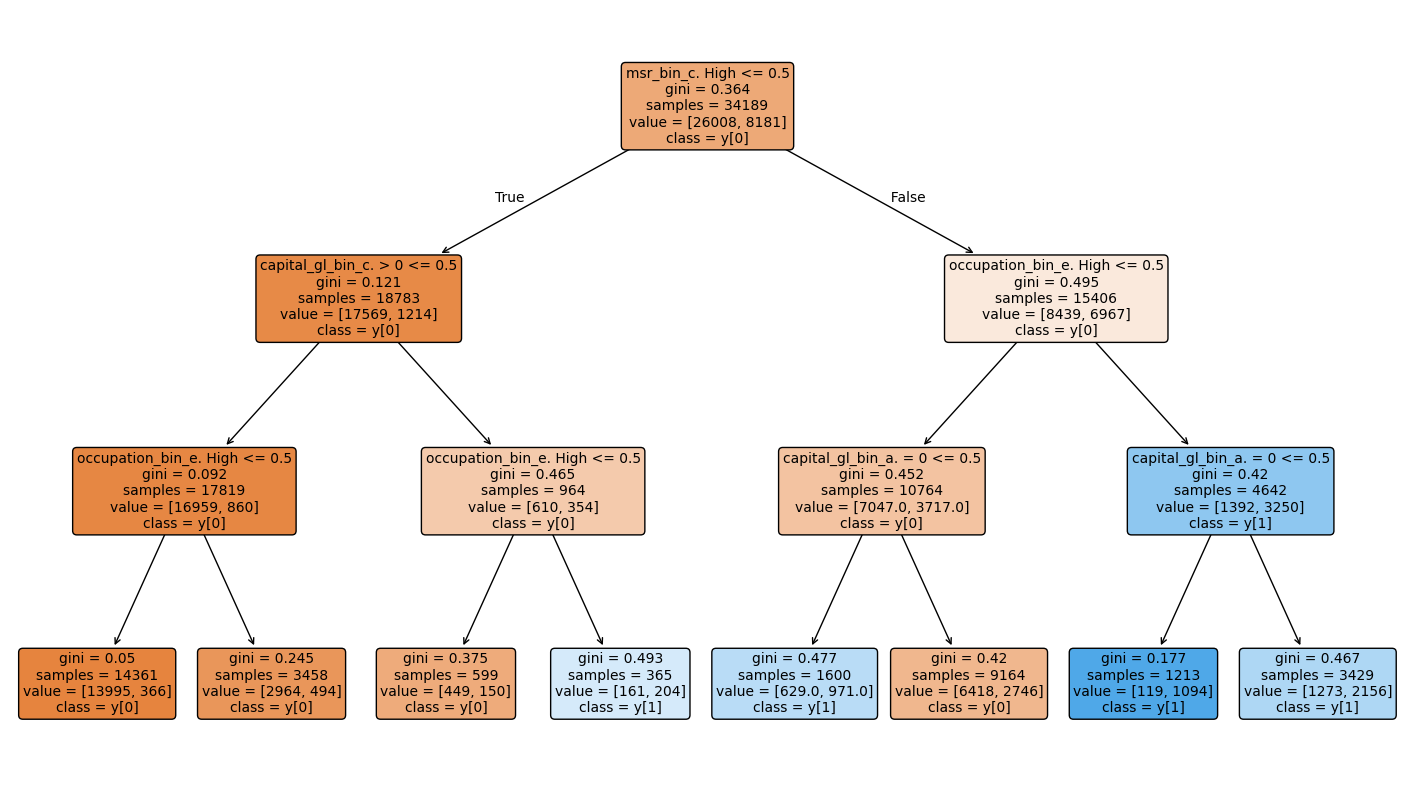

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    dtree3,
    feature_names=getattr(X_train, "columns", None),
    class_names=True,          # or pass a list like ["No", "Yes"]
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


***Showing our tree using scikit-learn.org guide***

Question 3 topic 5
change the parameters for best fit

In [ ]:
#run 1
dtree = DecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features=None,
    random_state=101
)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of gini:", accuracy)

dtree = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features=None,
    random_state=101
)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of entropy:", accuracy)

#interesting note, they are the exact same
#print(dtree.tree_.feature) I could run this to check but they are the same


Accuracy of gini: 0.8444004640687913
Accuracy of entropy: 0.8444004640687913


In this run, we test whether the **decision tree split criterion** changes model performance.  
We build two `DecisionTreeClassifier` models with identical hyperparameters and only change:

- `criterion="gini"` (Gini impurity)
- `criterion="entropy"` (Information gain / entropy)

All other settings are held constant (`splitter="best"`, no max depth limit, `min_samples_leaf=10`, etc.) so the comparison is fair and isolates the effect of the criterion.

After training each model, we evaluate using **accuracy** on the test set:
`accuracy_score(y_test, y_pred)`.


In [ ]:
#run 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def dtree_func(criterion, samp_leaf, max_feat, max_d):

    dtree = DecisionTreeClassifier(
        criterion=criterion,
        splitter="best",
        max_depth=max_d,
        min_samples_split=2,
        min_samples_leaf=samp_leaf,
        max_features=max_feat,
        random_state=101
    )

    # Fit the model
    dtree.fit(X_train, y_train)

    # Make predictions
    y_pred = dtree.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy


# Values from your image
leaf_values = [5, 10, 15, 20, 25, 30, 35, 40]

# Loop through them
for leaf in leaf_values:
    acc = dtree_func(
        criterion="entropy",
        samp_leaf=leaf,
        max_feat=None,
        max_d=10
    )

    print(f"min_samples_leaf = {leaf} --> Accuracy = {acc:.4f}")


#it appears that the more leaves = more accuracy, but I also know that with more variables, your score will improve whether they are right or not,
# so I am suggesting min samples be 25, it has the highest and is not too big


min_samples_leaf = 5 --> Accuracy = 0.8440
min_samples_leaf = 10 --> Accuracy = 0.8439
min_samples_leaf = 15 --> Accuracy = 0.8445
min_samples_leaf = 20 --> Accuracy = 0.8446
min_samples_leaf = 25 --> Accuracy = 0.8456
min_samples_leaf = 30 --> Accuracy = 0.8449
min_samples_leaf = 35 --> Accuracy = 0.8455
min_samples_leaf = 40 --> Accuracy = 0.8455


In [ ]:
#run 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def dtree_func(criterion, samp_leaf, max_feat, max_d):

    dtree = DecisionTreeClassifier(
        criterion=criterion,
        splitter="best",
        max_depth=max_d,
        min_samples_split=2,
        min_samples_leaf=samp_leaf,
        max_features=max_feat,
        random_state=101
    )

    # Fit the model
    dtree.fit(X_train, y_train)

    # Make predictions
    y_pred = dtree.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy


# Values from your image
max_features = [0.1, None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Loop through them
for features in max_features:
    acc = dtree_func(
        criterion = "entropy",
        samp_leaf = 25,
        max_feat = features,
        max_d = 10
    )

    print(f"max_features = {features} --> Accuracy = {acc:.4f}")

#the best max_features is 0.6



max_features = 0.1 --> Accuracy = 0.8276
max_features = None --> Accuracy = 0.8456
max_features = 0.3 --> Accuracy = 0.8417
max_features = 0.4 --> Accuracy = 0.8389
max_features = 0.5 --> Accuracy = 0.8420
max_features = 0.6 --> Accuracy = 0.8467
max_features = 0.7 --> Accuracy = 0.8436
max_features = 0.8 --> Accuracy = 0.8460


In [ ]:
#run 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def dtree_func(criterion, samp_leaf, max_feat, max_d):

    dtree = DecisionTreeClassifier(
        criterion=criterion,
        splitter="best",
        max_depth=max_d,
        min_samples_split=2,
        min_samples_leaf=samp_leaf,
        max_features=max_feat,
        random_state=101
    )

    # Fit the model
    dtree.fit(X_train, y_train)

    # Make predictions
    y_pred = dtree.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy


# Values from your image
max_depth = [2, 4, 6, 8, 10, 12, 14, 16]

# Loop through them
for depth in max_depth:
    acc = dtree_func(
        criterion = "entropy",
        samp_leaf = 25,
        max_feat = 0.6,
        max_d = depth
    )

    print(f"max_depth = {depth} --> Accuracy = {acc:.4f}")

#the best max_depth is 10



max_depth = 2 --> Accuracy = 0.7607
max_depth = 4 --> Accuracy = 0.8223
max_depth = 6 --> Accuracy = 0.8335
max_depth = 8 --> Accuracy = 0.8382
max_depth = 10 --> Accuracy = 0.8467
max_depth = 12 --> Accuracy = 0.8441
max_depth = 14 --> Accuracy = 0.8438
max_depth = 16 --> Accuracy = 0.8447


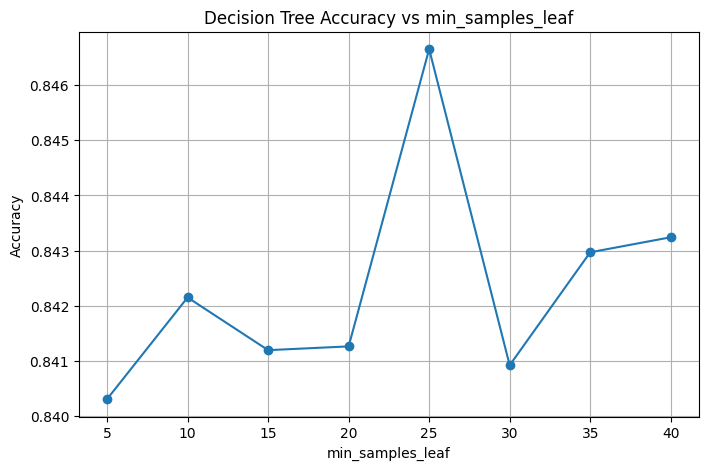

In [ ]:
import matplotlib.pyplot as plt

leaf_values = [5, 10, 15, 20, 25, 30, 35, 40]
accuracy_scores = []

for leaf in leaf_values:
    acc = dtree_func(
        criterion="entropy",
        samp_leaf=leaf,
        max_feat=0.6,
        max_d=10
    )
    accuracy_scores.append(acc)

# Convert non-numeric x values for plotting
x_labels = [str(x) for x in leaf_values]

plt.figure(figsize=(8,5))
plt.plot(x_labels, accuracy_scores, marker='o')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs min_samples_leaf")
plt.grid(True)
plt.show()


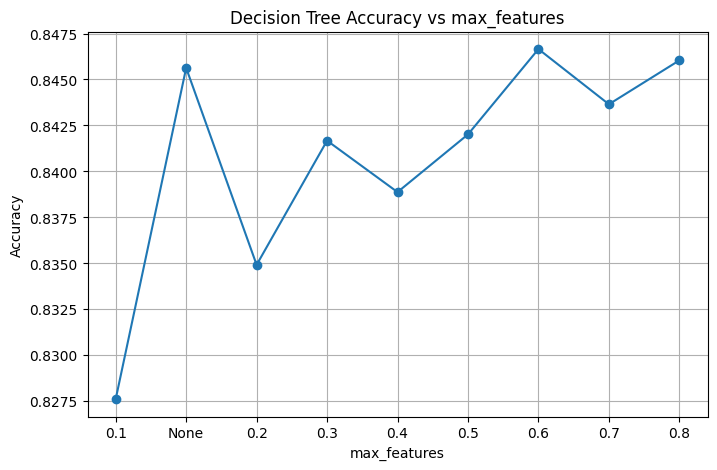

In [ ]:
import matplotlib.pyplot as plt

max_features_list = [0.1, None, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
accuracy_scores = []

for features in max_features_list:
    acc = dtree_func(
        criterion="entropy",
        samp_leaf=25,
        max_feat=features,
        max_d=10
    )
    accuracy_scores.append(acc)

# Convert non-numeric x values for plotting
x_labels = [str(x) for x in max_features_list]

plt.figure(figsize=(8,5))
plt.plot(x_labels, accuracy_scores, marker='o')
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs max_features")
plt.grid(True)
plt.show()


accuracy improves as max_features increases.

- The highest accuracy occurs around **0.6–0.8 and None**

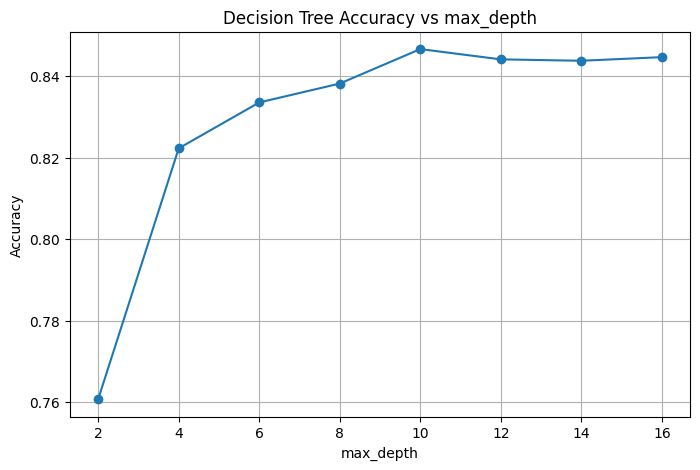

In [ ]:
import matplotlib.pyplot as plt

max_depth = [2, 4, 6, 8, 10, 12, 14, 16]
accuracy_scores = []

for depth in max_depth:
    acc = dtree_func(
        criterion="entropy",
        samp_leaf=25,
        max_feat=0.6,
        max_d=depth
    )
    accuracy_scores.append(acc)

# Convert non-numeric x values for plotting
x_labels = [str(x) for x in max_depth]

plt.figure(figsize=(8,5))
plt.plot(x_labels, accuracy_scores, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs max_depth")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

results = []

leaf_values = [5, 10, 15, 20, 25, 30, 35, 40]

for leaf in leaf_values:

    model = DecisionTreeClassifier(
        max_depth=10,
        min_samples_leaf=leaf,
        random_state=101
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([leaf, accuracy, recall, precision, f1])

# Create DataFrame
results_leaf_df = pd.DataFrame(
    results,
    columns=["Min Samples Leaf", "Accuracy", "Recall", "Precision", "F1 Score"]
)

results_leaf_df = results_leaf_df.round(4)

print(results_leaf_df)


   Min Samples Leaf  Accuracy  Recall  Precision  F1 Score
0                 5    0.8441  0.5801     0.7144    0.6403
1                10    0.8430  0.5770     0.7121    0.6375
2                15    0.8444  0.5779     0.7169    0.6399
3                20    0.8442  0.5744     0.7180    0.6383
4                25    0.8441  0.5724     0.7186    0.6372
5                30    0.8435  0.5722     0.7167    0.6363
6                35    0.8438  0.5839     0.7115    0.6414
7                40    0.8443  0.5836     0.7136    0.6421


 ***We change min_samples_leaf to see how it affects model performance***

 - Better F1-score with increase
 - Better Recall with increase
 - Similar Accuracy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

results = []

max_features_options = [0.1,None,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for feat in max_features_options:

    model = DecisionTreeClassifier(
        max_depth=10,
        min_samples_leaf=25,
        max_features=feat,
        random_state=101
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([feat, accuracy, recall, precision, f1])

# Create DataFrame
results_feat_df = pd.DataFrame(
    results,
    columns=["Max Features", "Accuracy", "Recall", "Precision", "F1 Score"]
)

results_feat_df = results_feat_df.round(4)

print(results_feat_df)


   Max Features  Accuracy  Recall  Precision  F1 Score
0           0.1    0.8272  0.5342     0.6757    0.5967
1           NaN    0.8441  0.5724     0.7186    0.6372
2           0.2    0.8391  0.5742     0.6997    0.6307
3           0.3    0.8407  0.5525     0.7169    0.6240
4           0.4    0.8401  0.5841     0.6983    0.6361
5           0.5    0.8434  0.5685     0.7182    0.6346
6           0.6    0.8429  0.5867     0.7069    0.6412
7           0.7    0.8451  0.5964     0.7098    0.6482
8           0.8    0.8439  0.5921     0.7076    0.6447


***Changing Max Features***

- Best accuracy and F1 score was 0.7

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

results = []

max_depth_options = [2,4,6,8,10,12,14,16]

for depth in max_depth_options:

    model = DecisionTreeClassifier(max_depth=depth, random_state=101)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([depth, accuracy, recall, precision, f1])

# Create DataFrame
results_df = pd.DataFrame(
    results,
    columns=["Maximum Depth", "Accuracy", "Recall", "Precision", "F1 Score"]
)

# Round values for cleaner display
results_df = results_df.round(4)

print(results_df)


   Maximum Depth  Accuracy  Recall  Precision  F1 Score
0              2    0.8149  0.4122     0.6894    0.5159
1              4    0.8280  0.5622     0.6668    0.6100
2              6    0.8381  0.6041     0.6826    0.6409
3              8    0.8424  0.6004     0.6986    0.6458
4             10    0.8432  0.5776     0.7128    0.6381
5             12    0.8426  0.5750     0.7116    0.6361
6             14    0.8416  0.5762     0.7075    0.6351
7             16    0.8413  0.5727     0.7080    0.6332


***We changed Tree Depth to see how it affects the model**

- Improve between depths 2 and 8
- After 8-10, accuracy and F1 score stop increasing

In [ ]:
#final best tree

dtree = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=25,
    max_features=0.6,
    random_state=101
)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of entropy:", accuracy)

#The accuracy here us 0.8438


Accuracy of entropy: 0.8412611751859688


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Build model
dtree = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=25,
    max_features=0.6,
    random_state=101
)

# Fit model
dtree.fit(X_train, y_train)

# Predict
y_pred = dtree.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Final Model Performance")
print("-----------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Final Model Performance
-----------------------
Accuracy : 0.8467
Recall   : 0.5930
Precision: 0.7171
F1 Score : 0.6492

Confusion Matrix:
[[10327   820]
 [ 1427  2079]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11147
           1       0.72      0.59      0.65      3506

    accuracy                           0.85     14653
   macro avg       0.80      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653



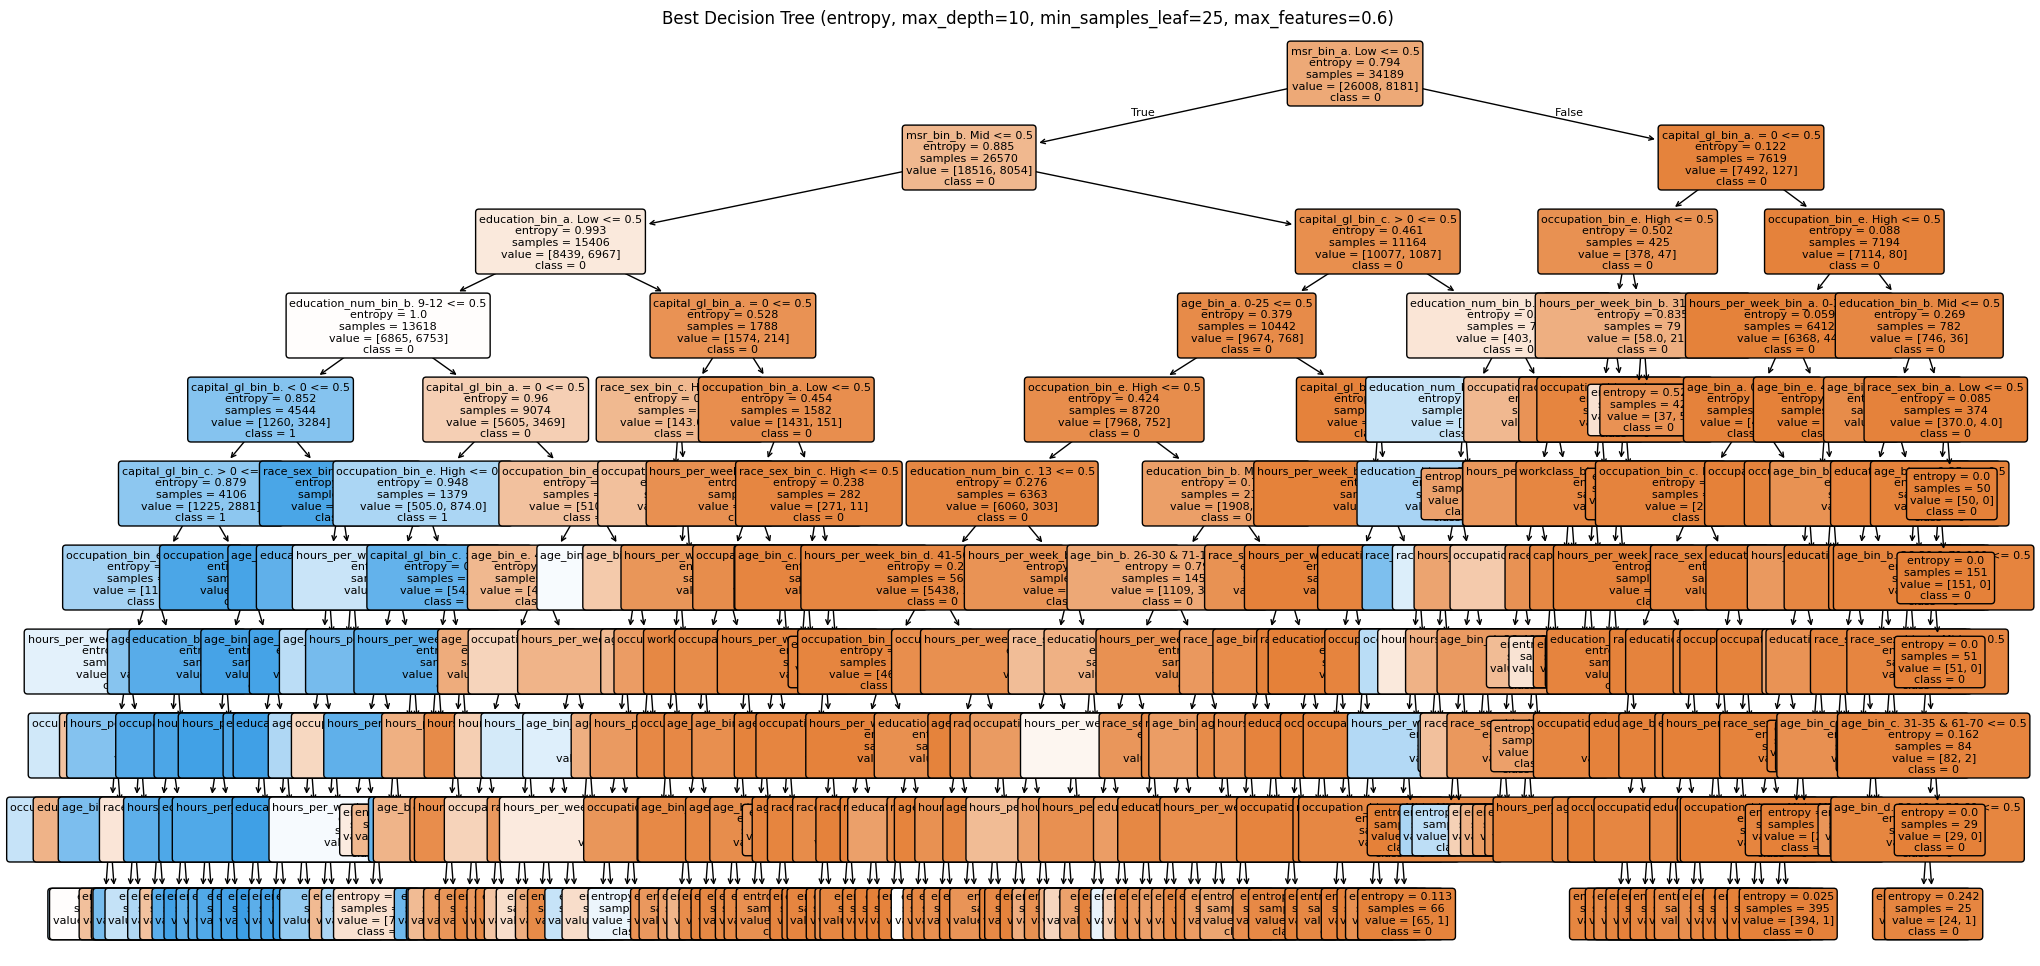

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 12))
plot_tree(
    dtree,
    filled=True,
    feature_names=X_train.columns,   # works if X_train is a DataFrame
    class_names=[str(c) for c in dtree.classes_],  # shows class labels
    rounded=True,
    fontsize=8
)
plt.title("Best Decision Tree (entropy, max_depth=10, min_samples_leaf=25, max_features=0.6)")
plt.show()


Total runtine to train the best model was 10 seconds
we found a pretty good tree but there are tons of leaves on it
This tree is definietly fully grown, there is almost no moire space on the diagram, but it does cover all of the eventualities.

In [ ]:
# ------------------------------------------------------------
# FINAL: Best Tree + Predict a "New" Individual (with binning + encoding)
# ------------------------------------------------------------

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# -----------------------------
# 1) TRAIN BEST-PERFORMING TREE
# -----------------------------
dtree = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=25,
    max_features=0.6,
    random_state=101
)

dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# -----------------------------
# 2) PERFORMANCE METRICS
# -----------------------------
accuracy  = accuracy_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("Final Best Tree Performance")
print("--------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---------------------------------------------
# 3) CREATE "NEW PERSON" INPUT (RAW -> BINNED)
# ---------------------------------------------
# Given:
# Hours/Week=48, Occupation=Mid-Low, MSR=High, Capital Gain=Yes,
# Race-Sex=Mid, Educ Years=12, Education=High, Workclass=Income, Age=58

# Using YOUR bin labels:
new_person = pd.DataFrame([{
    "hours_per_week_bin": "d. 41-50 & 61-70",      # 48 hours
    "occupation_bin":     "b. Mid - Low",          # given
    "msr_bin":            "c. High",               # given
    "capital_gl_bin":     "c. > 0",                # Capital Gain = Yes
    "race_sex_bin":       "b. Mid",                # given
    "education_num_bin":  "b. 9-12",               # 12 years
    "education_bin":      "e. High",               # given
    "workclass_bin":      "b. income",             # given
    "age_bin":            "d. 36-40 & 56-60"        # age 58
}])

# ---------------------------------------------------
# 4) ENCODE NEW PERSON EXACTLY LIKE TRAINING FEATURES
# ---------------------------------------------------
new_person_encoded = pd.get_dummies(new_person, drop_first=False)

# Align to training columns
new_person_encoded = new_person_encoded.reindex(columns=X_train.columns, fill_value=0)

# -----------------------------
# 5) PREDICT INCOME CATEGORY
# -----------------------------
new_pred = dtree.predict(new_person_encoded)[0]
print("\nNEW INDIVIDUAL PREDICTION")
print("--------------------------")
print("Predicted Income Category:", new_pred)

# Optional: probability (if you want to show confidence)
new_prob = dtree.predict_proba(new_person_encoded)[0]
print("\nPrediction Probabilities")
print("--------------------------")
print(f"P(class={dtree.classes_[0]}): {new_prob[0]:.4f}")
print(f"P(class={dtree.classes_[1]}): {new_prob[1]:.4f}")


Final Best Tree Performance
--------------------------
Accuracy : 0.8467
Recall   : 0.5930
Precision: 0.7171
F1 Score : 0.6492

Confusion Matrix:
[[10327   820]
 [ 1427  2079]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11147
           1       0.72      0.59      0.65      3506

    accuracy                           0.85     14653
   macro avg       0.80      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653


NEW INDIVIDUAL PREDICTION
--------------------------
Predicted Income Category: 1

Prediction Probabilities
--------------------------
P(class=0): 0.3220
P(class=1): 0.6780


In [ ]:
pred = dtree.predict(new_person_encoded)[0]
prob = dtree.predict_proba(new_person_encoded)[0]

# Find index of predicted class
class_index = list(dtree.classes_).index(pred)

print("Predicted Class:", pred)
print("Probability prediction is correct:", prob[class_index])


Predicted Class: 1
Probability prediction is correct: 0.6780185758513931
